## 1.Loading the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
pd.options.display.max_columns=None

In [4]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [5]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from mlxtend.classifier import StackingClassifier

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

## 2.Loading the Dataset

In [8]:
df_CC=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/Kaggle/credit_card/BankChurners.csv')

In [9]:
df_CC.shape

(10127, 23)

In [10]:
df_CC.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## 3.Exploratory Data Analysis

In [11]:
#dropping the last two columns

In [12]:
df_CC=df_CC.iloc[:,:21]

In [13]:
df_CC.shape

(10127, 21)

In [14]:
df_CC.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [15]:
#We can drop the clientnum column since we do not require it for building the model

In [16]:
df_CC=df_CC.drop('CLIENTNUM',axis=1)

In [17]:
df_CC.shape

(10127, 20)

In [18]:
df_CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [19]:
#Summary Statistics

In [20]:
df_CC.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [21]:
#Checking for Outliers wrt target column

In [22]:
cols=df_CC.select_dtypes(include=np.number)
cols.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [23]:
cols=['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

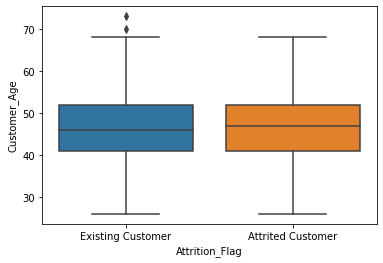

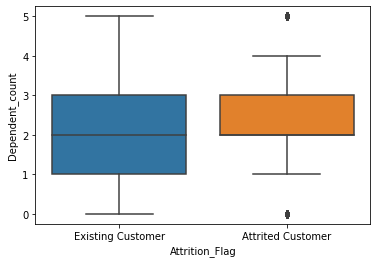

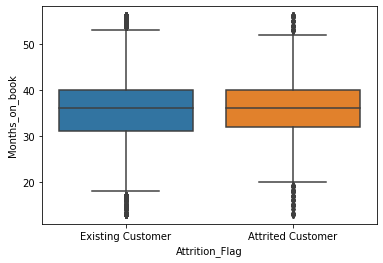

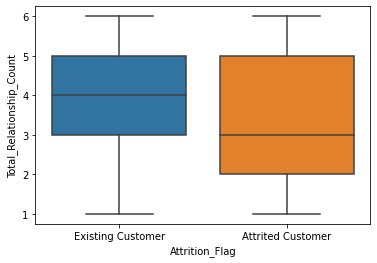

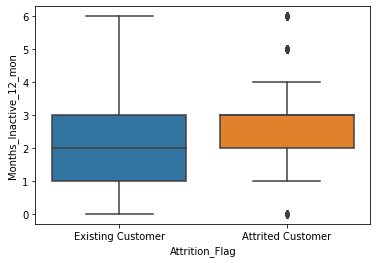

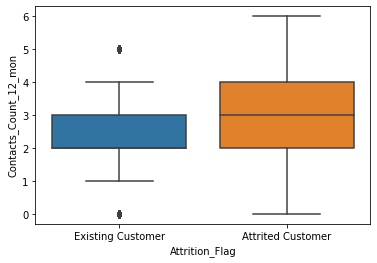

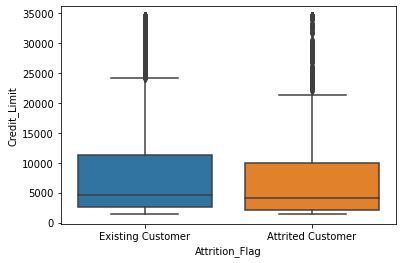

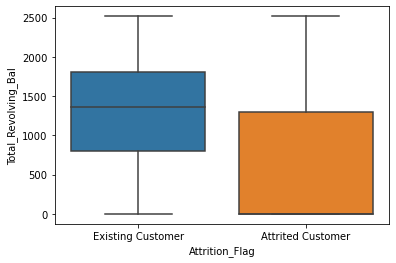

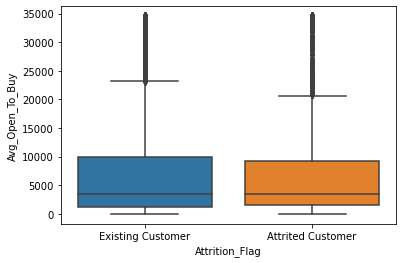

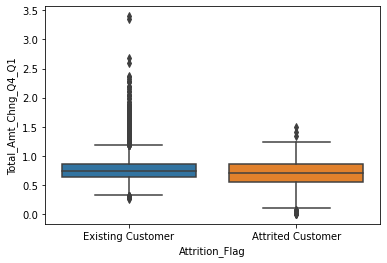

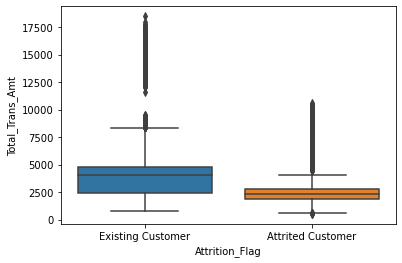

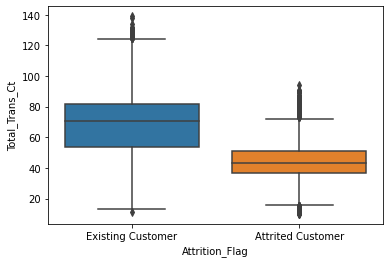

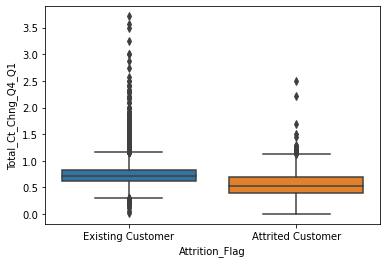

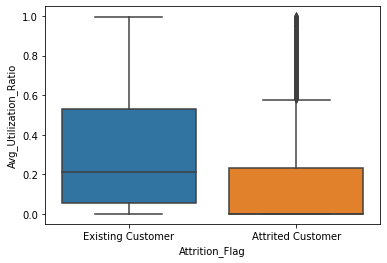

In [24]:
for col in cols:
    sns.boxplot(x='Attrition_Flag',y=df_CC[col],data=df_CC)
    plt.show()

We can see there are outliers in various columns.Our next step would be to treat them.

We can treat the outliers in age column by converting into a categorical data.

In [25]:
df_CC.Customer_Age.min(),df_CC.Customer_Age.max()

(26, 73)

In [26]:
df_CC['age_cat']=pd.cut(df_CC['Customer_Age'],bins=[25,40,55,75],labels=['young','middle','old'])

In [27]:
df_CC.age_cat.value_counts()

middle    6399
young     2397
old       1331
Name: age_cat, dtype: int64

In [28]:
#Dropping the Customer Age column since we do not require it for model building

In [29]:
df_CC=df_CC.drop('Customer_Age',axis=1)

In [30]:
def boundaries(data,variable):
    LL=data[variable].quantile(.25)-((data[variable].quantile(.75)-data[variable].quantile(.25))*1.5)
    UL=data[variable].quantile(.75)+((data[variable].quantile(.75)-data[variable].quantile(.25))*1.5)
    return LL,UL

In [31]:
cols=['Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [32]:
for col in cols:
    LL,UL=boundaries(df_CC,col)
    
    df_CC[col]=np.where(df_CC[col]<LL,LL,
                       np.where(df_CC[col]>UL,UL,df_CC[col]))

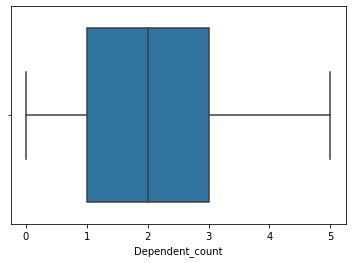

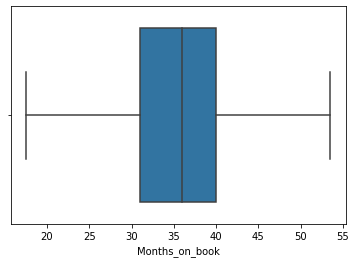

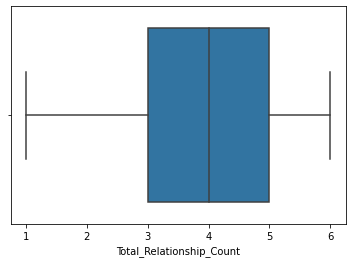

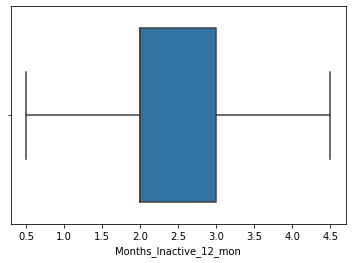

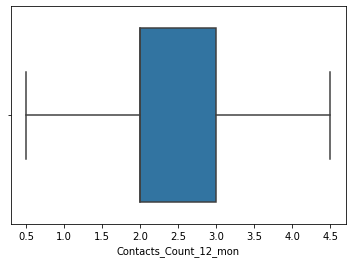

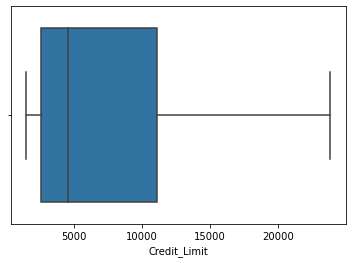

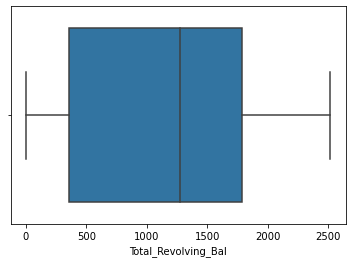

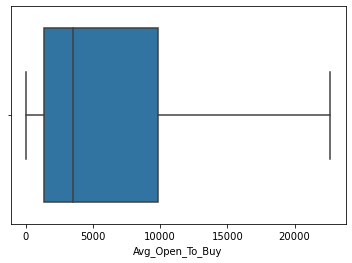

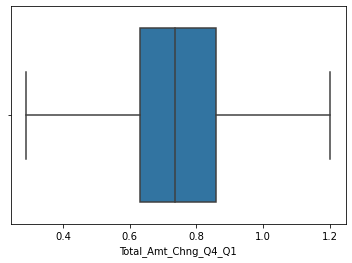

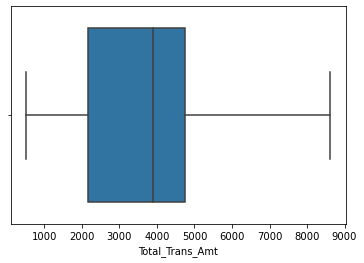

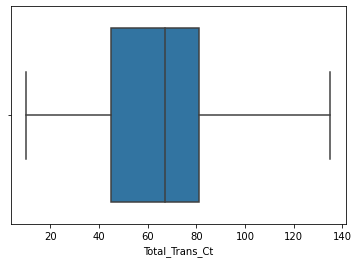

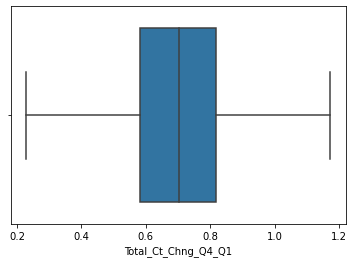

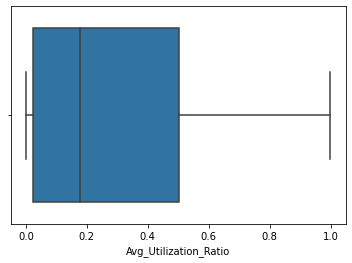

In [33]:
for col in cols:
    sns.boxplot(x=df_CC[col],data=df_CC)
    plt.show()

In [34]:
#Testing for Normality

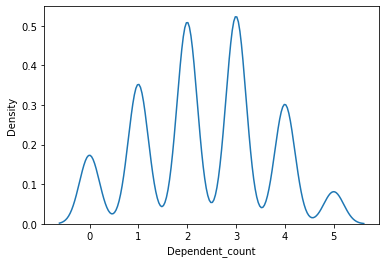

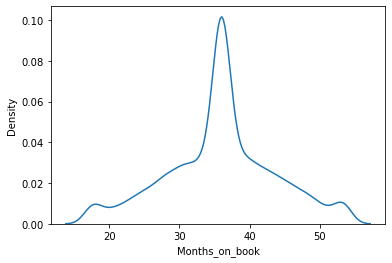

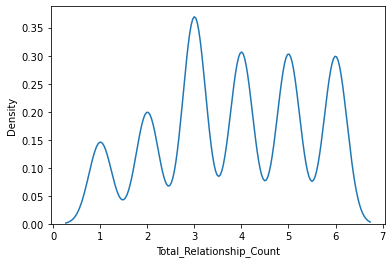

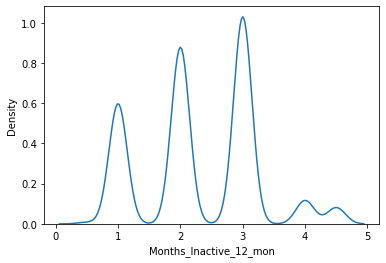

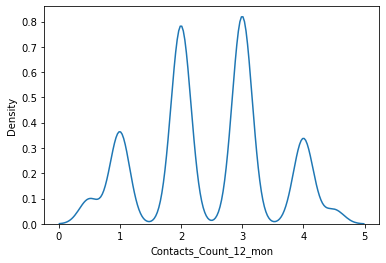

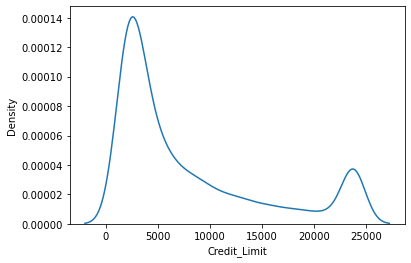

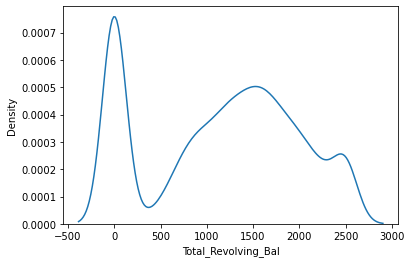

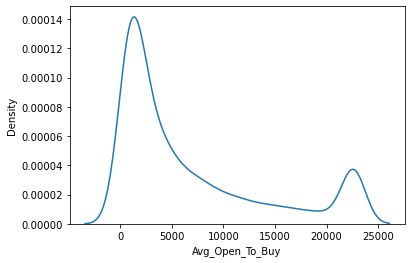

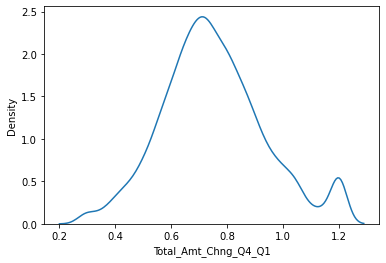

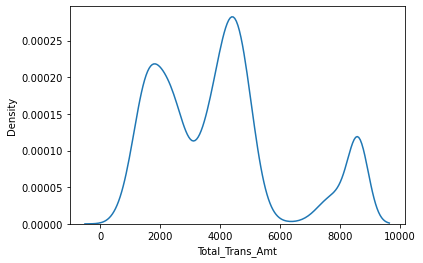

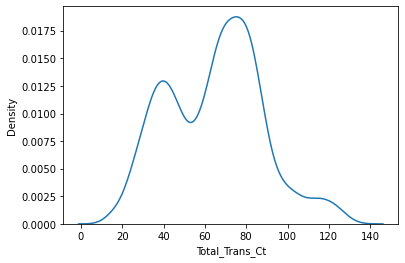

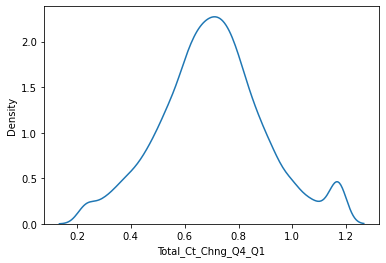

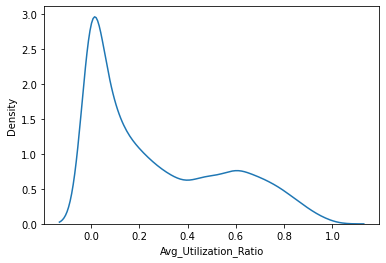

In [35]:
for col in cols:
    sns.kdeplot(x=df_CC[col],data=df_CC)
    plt.show()

In [36]:
#Checking for Linear Relationships(Linearity)

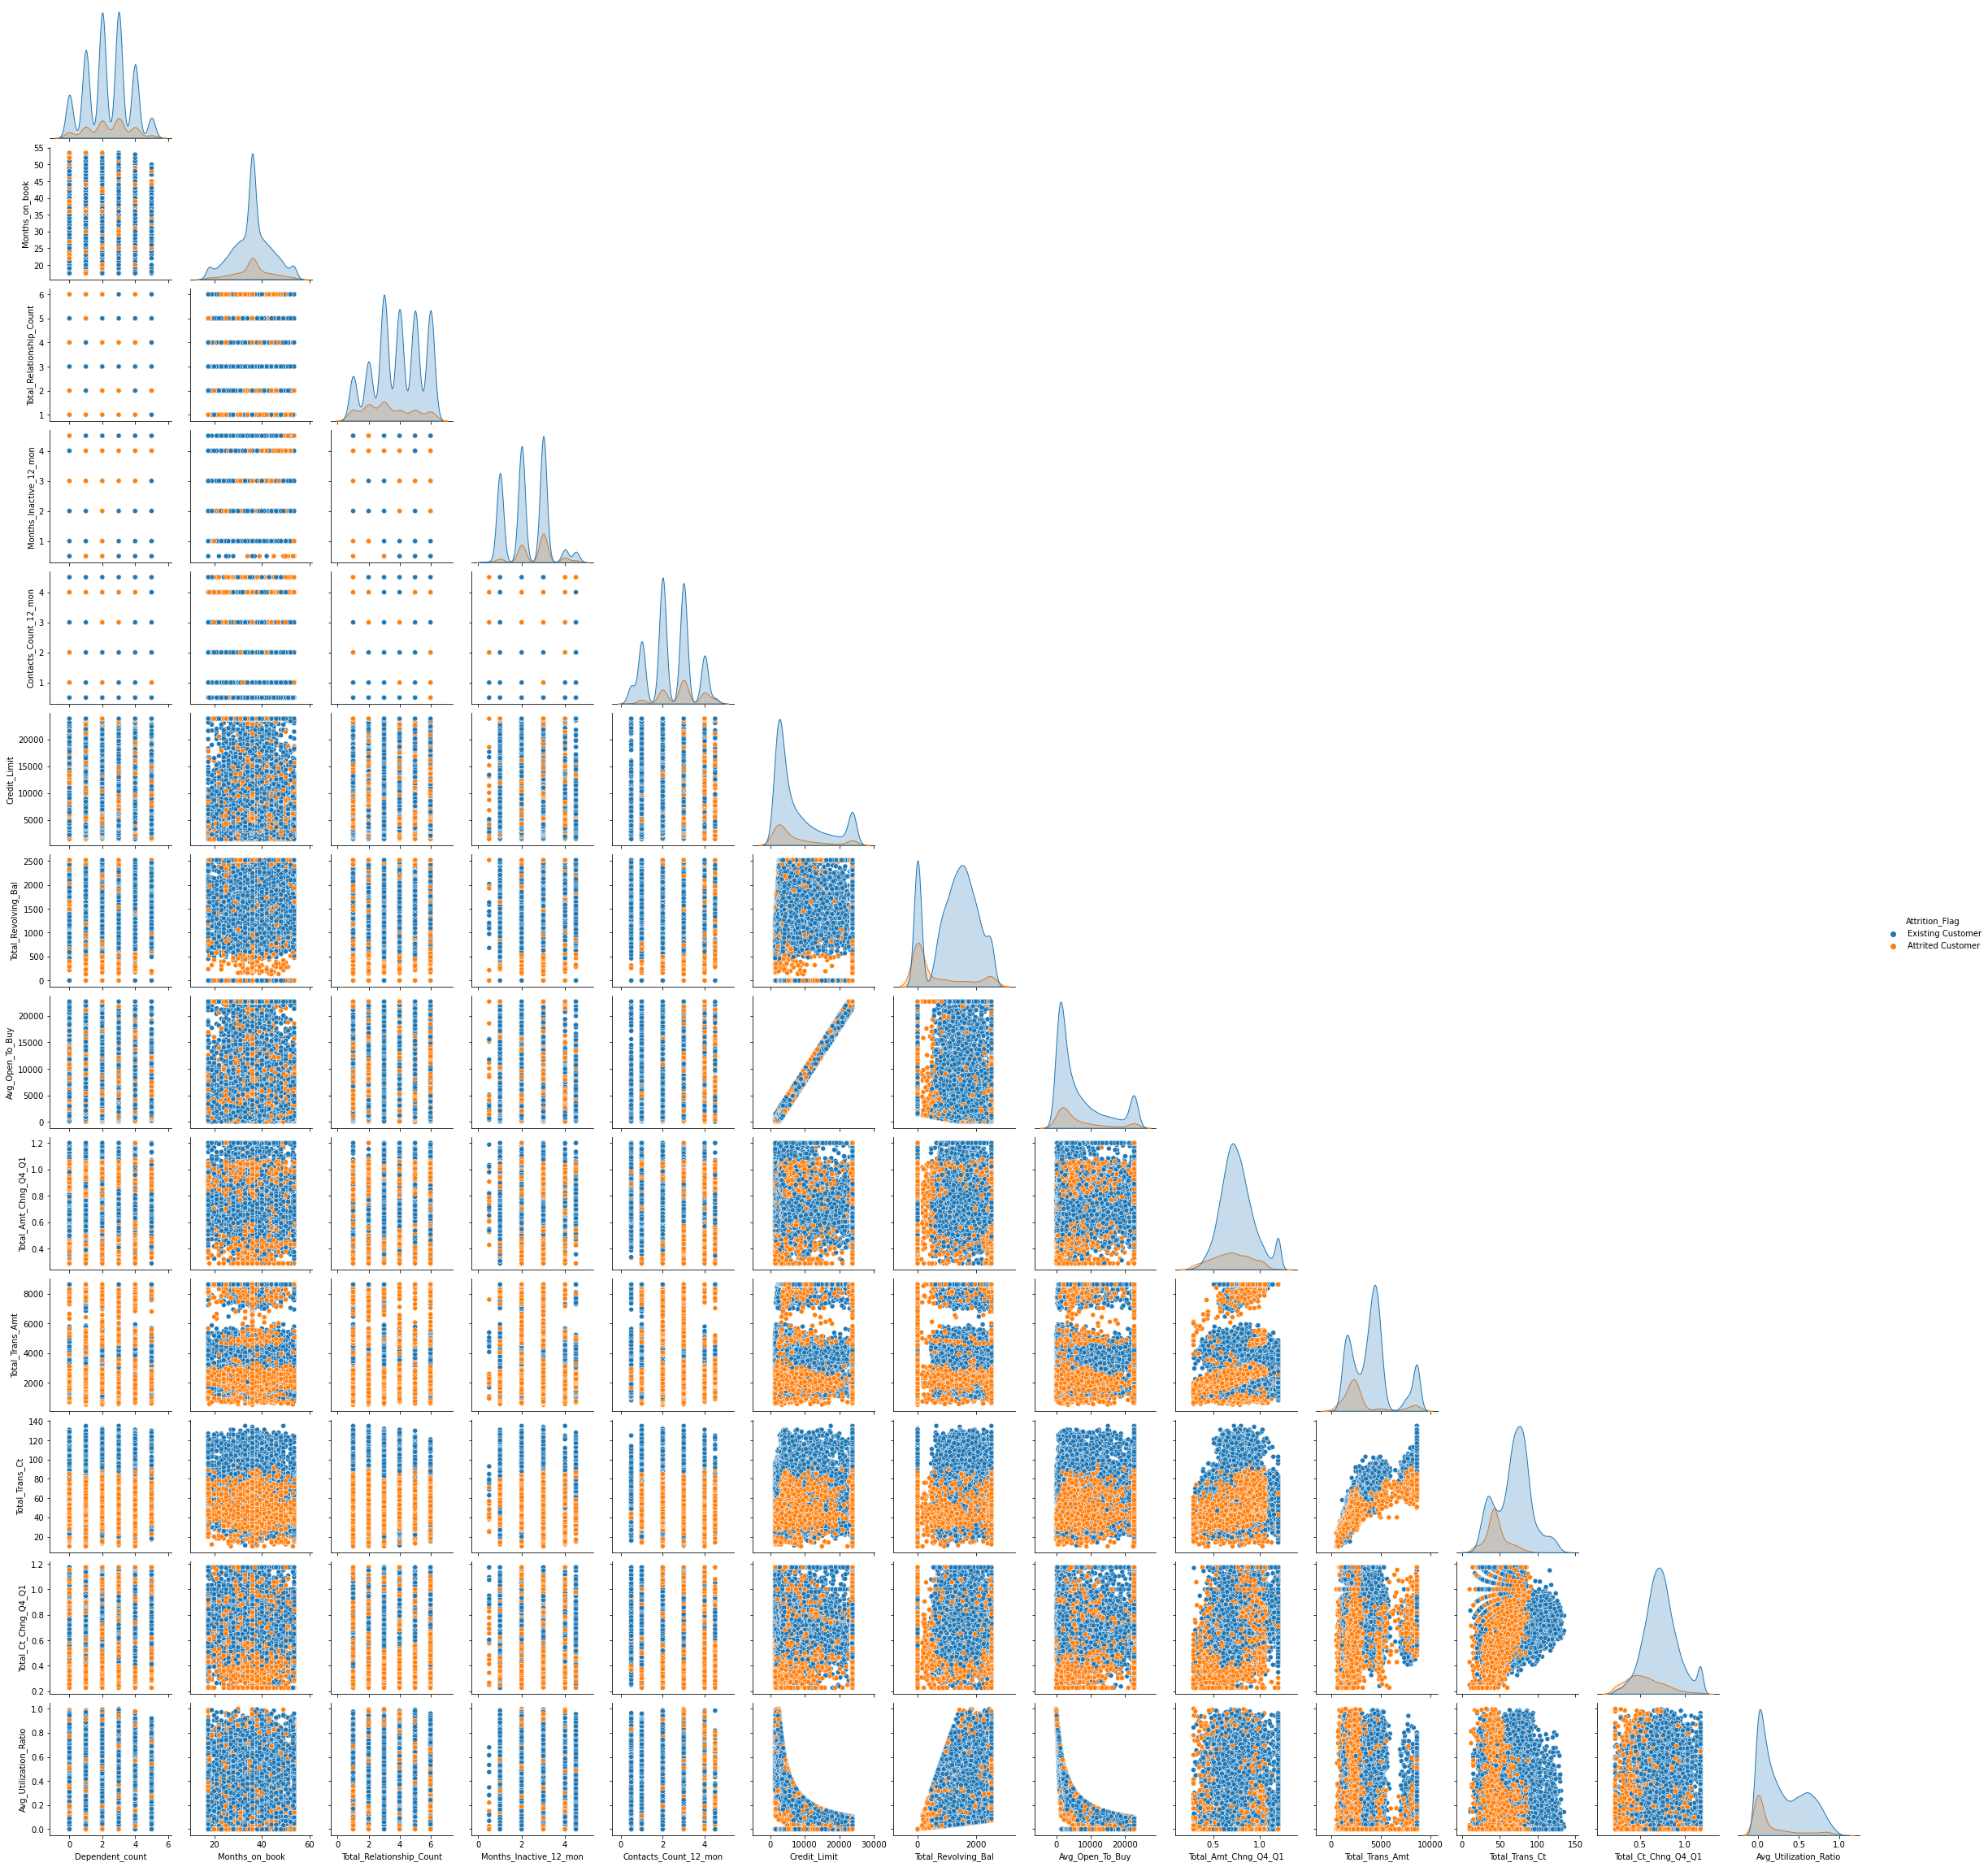

In [37]:
sns.pairplot(data=df_CC,hue='Attrition_Flag',corner=True)
plt.show()

We can see that there is a linear relationship existing between Avg_Open_to_Buy and Credit_Limit. We have to remove one of them to avoid linearity in data.

In [38]:
#Test for Correlation

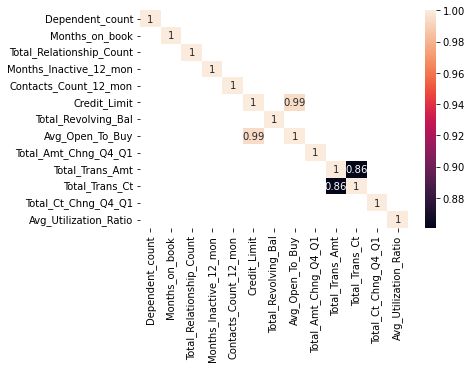

In [39]:
vcorr=df_CC.corr()
sns.heatmap(vcorr[(vcorr>0.80) | (vcorr<-0.80)],annot=True)
plt.show()

We can see that there is correlation existing between some features. We can treat it using PCA.

In [40]:
#Converting the target column into numerical column

In [41]:
def flag(x):
    if x=='Existing Customer':
        x=0
    if x=='Attrited Customer':
        x=1
    return x    

In [42]:
df_CC['Attrition_Flag']=df_CC['Attrition_Flag'].apply(flag)

In [43]:
df_CC.Attrition_Flag.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [44]:
#Creating a backup file

In [45]:
df_CC1=df_CC.copy(deep=True)

## 4.Dummy Encoding the Categorical Variables

In [46]:
df_CC1_dummy=pd.get_dummies(df_CC1,drop_first=True)

In [47]:
df_CC1_dummy.head()

,Attrition_Flag,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,age_cat_middle,age_cat_old
0,0,3.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1.201,1144.0,42.0,1.172,0.061,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0,5.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,1.201,1291.0,33.0,1.172,0.105,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,3.0,36.0,4.0,1.0,0.5,3418.0,0.0,3418.0,1.201,1887.0,20.0,1.172,0.000,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,0,4.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,1.201,1171.0,20.0,1.172,0.760,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,3.0,21.0,5.0,1.0,0.5,4716.0,0.0,4716.0,1.201,816.0,28.0,1.172,0.000,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0


## 5.Separating into independent and dependent features

In [48]:
X=df_CC1_dummy.drop('Attrition_Flag',axis=1)
y=df_CC1_dummy['Attrition_Flag']

In [49]:
X.shape,y.shape

((10127, 33), (10127,))

## 6.PCA

In [50]:
#Scaling the data

In [51]:
mn=MinMaxScaler()
X_scaled=mn.fit_transform(X)
df_X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
df_X_scaled.head()

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,age_cat_middle,age_cat_old
0,0.6,0.597222,0.8,0.125,0.625,0.502399,0.308701,0.525692,1.0,0.078182,0.256,1.0,0.061061,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.736111,1.0,0.125,0.375,0.304389,0.343266,0.326114,1.0,0.096310,0.184,1.0,0.105105,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.6,0.513889,0.6,0.125,0.000,0.088388,0.000000,0.150721,1.0,0.169806,0.080,1.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.8,0.458333,0.4,0.875,0.125,0.083700,1.000000,0.034999,1.0,0.081512,0.080,1.0,0.760761,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.6,0.097222,0.8,0.125,0.000,0.146339,0.000000,0.208008,1.0,0.037735,0.144,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
pca=PCA()

In [53]:
pca_CC=pca.fit_transform(df_X_scaled)
pca_CC

array([[ 8.43400166e-01, -7.26025852e-01, -1.05800920e-01, ...,
        -4.85157441e-02, -1.85024779e-03,  1.45911374e-03],
       [-6.24331352e-01,  6.79480543e-01, -6.10965534e-01, ...,
         5.01825108e-02, -1.91726747e-03, -6.13270475e-04],
       [ 6.46102420e-01, -7.64742431e-01, -2.68668591e-01, ...,
         1.36960680e-01,  9.79820293e-03,  2.00439495e-03],
       ...,
       [-6.52724267e-01, -6.12006327e-01, -3.80810984e-01, ...,
         3.61412338e-01, -9.63789092e-03,  2.15982429e-03],
       [ 4.19417763e-01,  1.30662234e-01,  4.85275014e-01, ...,
         3.36511722e-01, -6.89598161e-03,  3.57806837e-03],
       [-5.40732118e-01, -6.30604289e-01, -5.31880833e-01, ...,
         3.41781253e-01,  1.26276403e-03, -7.52377632e-03]])

In [54]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.14581274 0.26616601 0.34856271 0.42214494 0.48116516 0.53273871
 0.58231392 0.62396792 0.66510071 0.70404978 0.74124894 0.7721998
 0.80110169 0.82983073 0.8505782  0.86959697 0.88650078 0.9017793
 0.9166584  0.93018942 0.94335997 0.95508581 0.96577325 0.97334624
 0.97924745 0.98397695 0.98845449 0.99237054 0.99533046 0.9977922
 0.99944462 0.99998624 1.        ]


With 28 features, we can cater 99% variance.

In [55]:
df_pca_CC=pd.DataFrame(pca_CC[:,:28])
df_pca_CC.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.843400,-0.726026,-0.105801,-0.571343,-0.047468,-0.576503,0.521229,0.069406,0.762090,0.037761,0.142479,-0.058477,-0.062872,-0.289845,-0.333935,-0.137686,-0.138123,0.223517,-0.326852,0.642573,0.002527,-0.066837,-0.062085,-0.014844,-0.014845,-0.034703,0.009513,-0.028972
1,-0.624331,0.679481,-0.610966,0.719636,-0.254350,-0.137302,0.109612,0.008620,0.154325,-0.396120,0.192086,-0.076022,-0.045852,-0.468689,-0.500664,-0.050452,0.205852,0.485013,-0.263245,0.665911,0.047235,0.147542,-0.007089,0.042520,-0.021930,-0.166553,-0.078420,-0.026448
2,0.646102,-0.764742,-0.268669,0.728566,-0.064140,-0.243565,0.019064,-0.041499,-0.175503,-0.685496,0.007351,-0.088505,-0.130423,0.620883,-0.623103,-0.017987,0.320114,-0.004359,-0.334050,0.694943,-0.014171,-0.089009,0.207290,0.019711,-0.010368,0.021246,-0.075048,-0.038898
3,-0.945036,0.059881,0.358238,-0.550551,-0.199919,-0.522949,0.578393,0.057600,-0.419187,0.309678,0.188408,1.162187,0.018987,-0.117659,0.078586,-0.075831,0.477678,0.113699,0.487489,0.859969,0.085360,0.052498,0.046687,-0.008598,-0.182757,-0.191542,0.026579,-0.043259
4,0.554380,-0.642075,0.680081,-0.280568,-0.099373,-0.145694,-0.595580,0.793225,0.852020,-0.023949,-0.094623,0.178138,-0.694702,0.134525,-0.581411,-0.116523,0.472453,0.041345,-0.255312,0.621416,0.005441,-0.108820,0.076957,-0.009965,-0.034623,0.076393,-0.043889,-0.047729


In [56]:
#Checking for Correlation

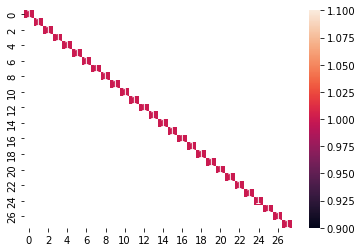

In [57]:
vcorr=df_pca_CC.corr()
sns.heatmap(vcorr[(vcorr>0.80) | (vcorr<-0.80)],annot=True)
plt.show()

We can see that there is no strong correlation between the features.

In [58]:
X=df_pca_CC

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [60]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8101, 28), (2026, 28), (8101,), (2026,))

## 7.Scaling the data

In [61]:
mn=MinMaxScaler()

X_train_scaled=mn.fit_transform(X_train)
X_test_scaled=mn.transform(X_test)

## 8.Setting the best parameters

In [62]:
#GridSearchCV

In [63]:
rf=RandomForestClassifier()

rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [64]:
tuned_parameters={'n_estimators':[85,100],'min_samples_split':[15,20],'max_depth':[8,10]}

In [65]:
gs_model=GridSearchCV(estimator=rf,param_grid=tuned_parameters,cv=5)
gs_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10], 'min_samples_split': [15, 20],
                         'n_estimators': [85, 100]})

In [66]:
print('Best Parameters are: ',gs_model.best_params_)

Best Parameters are:  {'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 85}


In [67]:
#finding the no. of neighbors for KNN classifier

In [68]:
k_values=range(3,21)

In [69]:
acc_score={}

In [70]:
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    y_pred=knn.predict(X_test_scaled)
    acc_score[k]=accuracy_score(y_test,y_pred)

In [71]:
max(acc_score.values())

0.8558736426456071

In [72]:
max(acc_score,key=acc_score.get)

9

## 9.Model Building

In [73]:
models=[LogisticRegression(),SGDClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),
        RandomForestClassifier(n_estimators=85,min_samples_split=20,max_depth=10),XGBClassifier(dual=False),
       KNeighborsClassifier(n_neighbors=9),AdaBoostClassifier(),GradientBoostingClassifier(),
       LGBMClassifier(),CatBoostClassifier(),SVC(kernel='linear'),SVC(kernel='rbf'),SVC(kernel='sigmoid'),SVC(kernel='poly'),GaussianNB()]

In [74]:
for i in range(16):
    models[i].fit(X_train_scaled,y_train)
    
    print(f'{models[i]}: ')
    y_pred=models[i].predict(X_test_scaled)
    
    print('Accuracy Score',accuracy_score(y_test,y_pred))
    print('Recall Score',recall_score(y_test,y_pred))
    print('Precision Score',precision_score(y_test,y_pred))
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('Classification Report: ')
    print(classification_report(y_test,y_pred))
    print()

LogisticRegression(): 
Accuracy Score 0.8830207305034551
Recall Score 0.3853211009174312
Precision Score 0.7777777777777778
Confusion Matrix: 
[[1663   36]
 [ 201  126]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1699
           1       0.78      0.39      0.52       327

    accuracy                           0.88      2026
   macro avg       0.83      0.68      0.72      2026
weighted avg       0.87      0.88      0.87      2026


SGDClassifier(): 
Accuracy Score 0.8815399802566634
Recall Score 0.44036697247706424
Precision Score 0.7164179104477612
Confusion Matrix: 
[[1642   57]
 [ 183  144]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1699
           1       0.72      0.44      0.55       327

    accuracy                           0.88      2026
   macro avg       0.81      0.70      0.74      2026
weighted avg    

43:	learn: 0.3226268	total: 761ms	remaining: 16.5s
44:	learn: 0.3199381	total: 776ms	remaining: 16.5s
45:	learn: 0.3175649	total: 790ms	remaining: 16.4s
46:	learn: 0.3154726	total: 805ms	remaining: 16.3s
47:	learn: 0.3136643	total: 819ms	remaining: 16.3s
48:	learn: 0.3121301	total: 834ms	remaining: 16.2s
49:	learn: 0.3105606	total: 852ms	remaining: 16.2s
50:	learn: 0.3090959	total: 868ms	remaining: 16.2s
51:	learn: 0.3070240	total: 887ms	remaining: 16.2s
52:	learn: 0.3057712	total: 902ms	remaining: 16.1s
53:	learn: 0.3037886	total: 916ms	remaining: 16s
54:	learn: 0.3023551	total: 932ms	remaining: 16s
55:	learn: 0.3009947	total: 947ms	remaining: 16s
56:	learn: 0.2998382	total: 965ms	remaining: 16s
57:	learn: 0.2983208	total: 982ms	remaining: 16s
58:	learn: 0.2970222	total: 997ms	remaining: 15.9s
59:	learn: 0.2958075	total: 1.01s	remaining: 15.8s
60:	learn: 0.2946821	total: 1.02s	remaining: 15.8s
61:	learn: 0.2936013	total: 1.04s	remaining: 15.7s
62:	learn: 0.2928805	total: 1.05s	remaini

204:	learn: 0.2228389	total: 3.12s	remaining: 12.1s
205:	learn: 0.2226498	total: 3.13s	remaining: 12.1s
206:	learn: 0.2223442	total: 3.15s	remaining: 12.1s
207:	learn: 0.2219147	total: 3.17s	remaining: 12.1s
208:	learn: 0.2217568	total: 3.18s	remaining: 12s
209:	learn: 0.2214880	total: 3.19s	remaining: 12s
210:	learn: 0.2213359	total: 3.21s	remaining: 12s
211:	learn: 0.2210531	total: 3.22s	remaining: 12s
212:	learn: 0.2207682	total: 3.24s	remaining: 12s
213:	learn: 0.2204899	total: 3.25s	remaining: 12s
214:	learn: 0.2201282	total: 3.27s	remaining: 11.9s
215:	learn: 0.2199453	total: 3.28s	remaining: 11.9s
216:	learn: 0.2196366	total: 3.3s	remaining: 11.9s
217:	learn: 0.2193598	total: 3.31s	remaining: 11.9s
218:	learn: 0.2191760	total: 3.33s	remaining: 11.9s
219:	learn: 0.2189217	total: 3.34s	remaining: 11.8s
220:	learn: 0.2186797	total: 3.35s	remaining: 11.8s
221:	learn: 0.2184903	total: 3.37s	remaining: 11.8s
222:	learn: 0.2183085	total: 3.38s	remaining: 11.8s
223:	learn: 0.2180104	tot

370:	learn: 0.1855522	total: 5.45s	remaining: 9.25s
371:	learn: 0.1853323	total: 5.47s	remaining: 9.24s
372:	learn: 0.1850588	total: 5.49s	remaining: 9.22s
373:	learn: 0.1848513	total: 5.5s	remaining: 9.2s
374:	learn: 0.1846933	total: 5.51s	remaining: 9.19s
375:	learn: 0.1844379	total: 5.53s	remaining: 9.17s
376:	learn: 0.1842918	total: 5.54s	remaining: 9.16s
377:	learn: 0.1841144	total: 5.55s	remaining: 9.14s
378:	learn: 0.1839633	total: 5.57s	remaining: 9.13s
379:	learn: 0.1837729	total: 5.58s	remaining: 9.11s
380:	learn: 0.1836382	total: 5.6s	remaining: 9.09s
381:	learn: 0.1834395	total: 5.61s	remaining: 9.08s
382:	learn: 0.1833135	total: 5.62s	remaining: 9.06s
383:	learn: 0.1829946	total: 5.64s	remaining: 9.04s
384:	learn: 0.1828587	total: 5.65s	remaining: 9.03s
385:	learn: 0.1825977	total: 5.67s	remaining: 9.02s
386:	learn: 0.1824562	total: 5.68s	remaining: 9s
387:	learn: 0.1822134	total: 5.7s	remaining: 8.98s
388:	learn: 0.1820154	total: 5.71s	remaining: 8.97s
389:	learn: 0.18189

538:	learn: 0.1557488	total: 7.81s	remaining: 6.68s
539:	learn: 0.1554678	total: 7.83s	remaining: 6.67s
540:	learn: 0.1552860	total: 7.84s	remaining: 6.65s
541:	learn: 0.1551322	total: 7.85s	remaining: 6.64s
542:	learn: 0.1550109	total: 7.87s	remaining: 6.62s
543:	learn: 0.1548442	total: 7.88s	remaining: 6.61s
544:	learn: 0.1546643	total: 7.89s	remaining: 6.59s
545:	learn: 0.1545210	total: 7.91s	remaining: 6.58s
546:	learn: 0.1543825	total: 7.92s	remaining: 6.56s
547:	learn: 0.1541999	total: 7.94s	remaining: 6.55s
548:	learn: 0.1541041	total: 7.95s	remaining: 6.53s
549:	learn: 0.1538579	total: 7.96s	remaining: 6.52s
550:	learn: 0.1537245	total: 7.98s	remaining: 6.5s
551:	learn: 0.1535399	total: 7.99s	remaining: 6.49s
552:	learn: 0.1534333	total: 8.01s	remaining: 6.47s
553:	learn: 0.1533466	total: 8.02s	remaining: 6.46s
554:	learn: 0.1531982	total: 8.04s	remaining: 6.44s
555:	learn: 0.1530781	total: 8.05s	remaining: 6.43s
556:	learn: 0.1529221	total: 8.06s	remaining: 6.41s
557:	learn: 0

708:	learn: 0.1317320	total: 10.2s	remaining: 4.19s
709:	learn: 0.1315965	total: 10.2s	remaining: 4.17s
710:	learn: 0.1314408	total: 10.2s	remaining: 4.16s
711:	learn: 0.1313631	total: 10.2s	remaining: 4.14s
712:	learn: 0.1312613	total: 10.3s	remaining: 4.13s
713:	learn: 0.1311423	total: 10.3s	remaining: 4.11s
714:	learn: 0.1310133	total: 10.3s	remaining: 4.1s
715:	learn: 0.1309013	total: 10.3s	remaining: 4.08s
716:	learn: 0.1307326	total: 10.3s	remaining: 4.07s
717:	learn: 0.1305883	total: 10.3s	remaining: 4.06s
718:	learn: 0.1305119	total: 10.3s	remaining: 4.04s
719:	learn: 0.1304223	total: 10.4s	remaining: 4.03s
720:	learn: 0.1302001	total: 10.4s	remaining: 4.01s
721:	learn: 0.1300882	total: 10.4s	remaining: 4s
722:	learn: 0.1299325	total: 10.4s	remaining: 3.98s
723:	learn: 0.1298476	total: 10.4s	remaining: 3.97s
724:	learn: 0.1298196	total: 10.4s	remaining: 3.96s
725:	learn: 0.1296949	total: 10.4s	remaining: 3.94s
726:	learn: 0.1295446	total: 10.5s	remaining: 3.93s
727:	learn: 0.12

879:	learn: 0.1133358	total: 12.6s	remaining: 1.72s
880:	learn: 0.1132330	total: 12.6s	remaining: 1.71s
881:	learn: 0.1131217	total: 12.6s	remaining: 1.69s
882:	learn: 0.1130406	total: 12.7s	remaining: 1.68s
883:	learn: 0.1129481	total: 12.7s	remaining: 1.66s
884:	learn: 0.1128357	total: 12.7s	remaining: 1.65s
885:	learn: 0.1127509	total: 12.7s	remaining: 1.63s
886:	learn: 0.1126255	total: 12.7s	remaining: 1.62s
887:	learn: 0.1125419	total: 12.7s	remaining: 1.6s
888:	learn: 0.1124728	total: 12.7s	remaining: 1.59s
889:	learn: 0.1123765	total: 12.7s	remaining: 1.57s
890:	learn: 0.1122736	total: 12.8s	remaining: 1.56s
891:	learn: 0.1121187	total: 12.8s	remaining: 1.55s
892:	learn: 0.1120943	total: 12.8s	remaining: 1.53s
893:	learn: 0.1120136	total: 12.8s	remaining: 1.52s
894:	learn: 0.1118791	total: 12.8s	remaining: 1.5s
895:	learn: 0.1118033	total: 12.8s	remaining: 1.49s
896:	learn: 0.1117024	total: 12.8s	remaining: 1.47s
897:	learn: 0.1116264	total: 12.9s	remaining: 1.46s
898:	learn: 0.

SVC(kernel='poly'): 
Accuracy Score 0.8993089832181639
Recall Score 0.5535168195718655
Precision Score 0.7573221757322176
Confusion Matrix: 
[[1641   58]
 [ 146  181]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1699
           1       0.76      0.55      0.64       327

    accuracy                           0.90      2026
   macro avg       0.84      0.76      0.79      2026
weighted avg       0.89      0.90      0.89      2026


GaussianNB(): 
Accuracy Score 0.8692003948667325
Recall Score 0.38837920489296635
Precision Score 0.6614583333333334
Confusion Matrix: 
[[1634   65]
 [ 200  127]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1699
           1       0.66      0.39      0.49       327

    accuracy                           0.87      2026
   macro avg       0.78      0.68      0.71      2026
weighted avg       0.

We can find that with CatBoostClassifier model, we can get an accuracy of 90% but the recall value is 51% approx. Let us try with Stacking.

## 10.Stacking

In [75]:
stack=StackingClassifier(classifiers=[XGBClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),
LGBMClassifier(),CatBoostClassifier(),SVC(kernel='poly'),GaussianNB()],meta_classifier=CatBoostClassifier())

In [76]:
model_stack=stack.fit(X_train_scaled,y_train)

Learning rate set to 0.02517
0:	learn: 0.6708573	total: 14.8ms	remaining: 14.8s
1:	learn: 0.6500616	total: 29ms	remaining: 14.5s
2:	learn: 0.6292795	total: 42.7ms	remaining: 14.2s
3:	learn: 0.6129062	total: 56.3ms	remaining: 14s
4:	learn: 0.5937011	total: 70.2ms	remaining: 14s
5:	learn: 0.5768863	total: 83.8ms	remaining: 13.9s
6:	learn: 0.5599483	total: 97.9ms	remaining: 13.9s
7:	learn: 0.5457709	total: 111ms	remaining: 13.8s
8:	learn: 0.5307753	total: 125ms	remaining: 13.7s
9:	learn: 0.5183587	total: 139ms	remaining: 13.7s
10:	learn: 0.5043171	total: 152ms	remaining: 13.7s
11:	learn: 0.4920481	total: 166ms	remaining: 13.7s
12:	learn: 0.4801624	total: 179ms	remaining: 13.6s
13:	learn: 0.4699803	total: 194ms	remaining: 13.7s
14:	learn: 0.4600604	total: 209ms	remaining: 13.7s
15:	learn: 0.4513791	total: 223ms	remaining: 13.7s
16:	learn: 0.4422564	total: 238ms	remaining: 13.7s
17:	learn: 0.4335542	total: 252ms	remaining: 13.7s
18:	learn: 0.4252481	total: 267ms	remaining: 13.8s
19:	learn: 

168:	learn: 0.2333617	total: 2.37s	remaining: 11.6s
169:	learn: 0.2330284	total: 2.38s	remaining: 11.6s
170:	learn: 0.2324867	total: 2.39s	remaining: 11.6s
171:	learn: 0.2322181	total: 2.41s	remaining: 11.6s
172:	learn: 0.2319269	total: 2.42s	remaining: 11.6s
173:	learn: 0.2315864	total: 2.44s	remaining: 11.6s
174:	learn: 0.2313543	total: 2.45s	remaining: 11.5s
175:	learn: 0.2310088	total: 2.46s	remaining: 11.5s
176:	learn: 0.2306973	total: 2.47s	remaining: 11.5s
177:	learn: 0.2304224	total: 2.48s	remaining: 11.5s
178:	learn: 0.2302066	total: 2.5s	remaining: 11.4s
179:	learn: 0.2299308	total: 2.51s	remaining: 11.4s
180:	learn: 0.2296409	total: 2.52s	remaining: 11.4s
181:	learn: 0.2293702	total: 2.53s	remaining: 11.4s
182:	learn: 0.2290222	total: 2.55s	remaining: 11.4s
183:	learn: 0.2286482	total: 2.56s	remaining: 11.3s
184:	learn: 0.2283645	total: 2.57s	remaining: 11.3s
185:	learn: 0.2280948	total: 2.59s	remaining: 11.3s
186:	learn: 0.2278885	total: 2.6s	remaining: 11.3s
187:	learn: 0.

338:	learn: 0.1918655	total: 4.75s	remaining: 9.26s
339:	learn: 0.1916254	total: 4.77s	remaining: 9.25s
340:	learn: 0.1914971	total: 4.78s	remaining: 9.24s
341:	learn: 0.1912037	total: 4.8s	remaining: 9.23s
342:	learn: 0.1910403	total: 4.81s	remaining: 9.22s
343:	learn: 0.1908680	total: 4.83s	remaining: 9.21s
344:	learn: 0.1907066	total: 4.84s	remaining: 9.2s
345:	learn: 0.1905467	total: 4.86s	remaining: 9.19s
346:	learn: 0.1902954	total: 4.88s	remaining: 9.18s
347:	learn: 0.1901524	total: 4.89s	remaining: 9.17s
348:	learn: 0.1898738	total: 4.91s	remaining: 9.16s
349:	learn: 0.1897352	total: 4.92s	remaining: 9.15s
350:	learn: 0.1895162	total: 4.94s	remaining: 9.13s
351:	learn: 0.1893176	total: 4.96s	remaining: 9.12s
352:	learn: 0.1890433	total: 4.97s	remaining: 9.11s
353:	learn: 0.1888730	total: 4.99s	remaining: 9.11s
354:	learn: 0.1887309	total: 5.01s	remaining: 9.1s
355:	learn: 0.1885909	total: 5.02s	remaining: 9.08s
356:	learn: 0.1883251	total: 5.04s	remaining: 9.07s
357:	learn: 0.1

506:	learn: 0.1606168	total: 7.11s	remaining: 6.91s
507:	learn: 0.1603402	total: 7.12s	remaining: 6.9s
508:	learn: 0.1602180	total: 7.14s	remaining: 6.88s
509:	learn: 0.1600203	total: 7.15s	remaining: 6.87s
510:	learn: 0.1598667	total: 7.16s	remaining: 6.85s
511:	learn: 0.1597091	total: 7.18s	remaining: 6.84s
512:	learn: 0.1595780	total: 7.19s	remaining: 6.83s
513:	learn: 0.1594741	total: 7.2s	remaining: 6.81s
514:	learn: 0.1593500	total: 7.22s	remaining: 6.79s
515:	learn: 0.1591485	total: 7.23s	remaining: 6.78s
516:	learn: 0.1590242	total: 7.24s	remaining: 6.76s
517:	learn: 0.1588253	total: 7.25s	remaining: 6.75s
518:	learn: 0.1586055	total: 7.26s	remaining: 6.73s
519:	learn: 0.1584703	total: 7.28s	remaining: 6.72s
520:	learn: 0.1583670	total: 7.29s	remaining: 6.7s
521:	learn: 0.1582500	total: 7.31s	remaining: 6.69s
522:	learn: 0.1581087	total: 7.32s	remaining: 6.67s
523:	learn: 0.1580066	total: 7.33s	remaining: 6.66s
524:	learn: 0.1578871	total: 7.34s	remaining: 6.64s
525:	learn: 0.1

667:	learn: 0.1368659	total: 9.25s	remaining: 4.6s
668:	learn: 0.1366143	total: 9.26s	remaining: 4.58s
669:	learn: 0.1364806	total: 9.28s	remaining: 4.57s
670:	learn: 0.1364164	total: 9.29s	remaining: 4.55s
671:	learn: 0.1362933	total: 9.3s	remaining: 4.54s
672:	learn: 0.1361818	total: 9.31s	remaining: 4.53s
673:	learn: 0.1360842	total: 9.33s	remaining: 4.51s
674:	learn: 0.1359424	total: 9.34s	remaining: 4.5s
675:	learn: 0.1357132	total: 9.36s	remaining: 4.48s
676:	learn: 0.1356044	total: 9.37s	remaining: 4.47s
677:	learn: 0.1354857	total: 9.38s	remaining: 4.46s
678:	learn: 0.1353839	total: 9.39s	remaining: 4.44s
679:	learn: 0.1352577	total: 9.41s	remaining: 4.43s
680:	learn: 0.1351419	total: 9.42s	remaining: 4.41s
681:	learn: 0.1349874	total: 9.43s	remaining: 4.4s
682:	learn: 0.1348401	total: 9.45s	remaining: 4.38s
683:	learn: 0.1347167	total: 9.46s	remaining: 4.37s
684:	learn: 0.1346059	total: 9.48s	remaining: 4.36s
685:	learn: 0.1344077	total: 9.49s	remaining: 4.34s
686:	learn: 0.13

831:	learn: 0.1178852	total: 11.6s	remaining: 2.34s
832:	learn: 0.1177465	total: 11.6s	remaining: 2.33s
833:	learn: 0.1176341	total: 11.6s	remaining: 2.31s
834:	learn: 0.1175313	total: 11.6s	remaining: 2.3s
835:	learn: 0.1174161	total: 11.6s	remaining: 2.28s
836:	learn: 0.1172629	total: 11.7s	remaining: 2.27s
837:	learn: 0.1172358	total: 11.7s	remaining: 2.26s
838:	learn: 0.1171230	total: 11.7s	remaining: 2.24s
839:	learn: 0.1170066	total: 11.7s	remaining: 2.23s
840:	learn: 0.1168927	total: 11.7s	remaining: 2.21s
841:	learn: 0.1167863	total: 11.7s	remaining: 2.2s
842:	learn: 0.1166060	total: 11.7s	remaining: 2.19s
843:	learn: 0.1165127	total: 11.8s	remaining: 2.17s
844:	learn: 0.1163937	total: 11.8s	remaining: 2.16s
845:	learn: 0.1163490	total: 11.8s	remaining: 2.15s
846:	learn: 0.1162613	total: 11.8s	remaining: 2.13s
847:	learn: 0.1162116	total: 11.8s	remaining: 2.12s
848:	learn: 0.1161536	total: 11.8s	remaining: 2.1s
849:	learn: 0.1160751	total: 11.8s	remaining: 2.09s
850:	learn: 0.1

997:	learn: 0.1029133	total: 14s	remaining: 28ms
998:	learn: 0.1028288	total: 14s	remaining: 14ms
999:	learn: 0.1027365	total: 14s	remaining: 0us
Learning rate set to 0.02517
0:	learn: 0.5940193	total: 8.32ms	remaining: 8.31s
1:	learn: 0.5079807	total: 16.9ms	remaining: 8.43s
2:	learn: 0.4337514	total: 23.7ms	remaining: 7.88s
3:	learn: 0.3706854	total: 31.2ms	remaining: 7.76s
4:	learn: 0.3147850	total: 37.2ms	remaining: 7.4s
5:	learn: 0.2674302	total: 42.6ms	remaining: 7.05s
6:	learn: 0.2286009	total: 48.2ms	remaining: 6.84s
7:	learn: 0.1942738	total: 53.8ms	remaining: 6.68s
8:	learn: 0.1657885	total: 60.3ms	remaining: 6.64s
9:	learn: 0.1419764	total: 66.7ms	remaining: 6.6s
10:	learn: 0.1206605	total: 72.3ms	remaining: 6.5s
11:	learn: 0.1035358	total: 78.7ms	remaining: 6.48s
12:	learn: 0.0892699	total: 84.7ms	remaining: 6.43s
13:	learn: 0.0772017	total: 91.1ms	remaining: 6.41s
14:	learn: 0.0665927	total: 96.5ms	remaining: 6.34s
15:	learn: 0.0579194	total: 103ms	remaining: 6.32s
16:	lea

161:	learn: 0.0002722	total: 1.09s	remaining: 5.67s
162:	learn: 0.0002695	total: 1.1s	remaining: 5.66s
163:	learn: 0.0002666	total: 1.11s	remaining: 5.65s
164:	learn: 0.0002650	total: 1.11s	remaining: 5.65s
165:	learn: 0.0002630	total: 1.12s	remaining: 5.63s
166:	learn: 0.0002614	total: 1.13s	remaining: 5.63s
167:	learn: 0.0002549	total: 1.14s	remaining: 5.63s
168:	learn: 0.0002548	total: 1.14s	remaining: 5.62s
169:	learn: 0.0002549	total: 1.15s	remaining: 5.61s
170:	learn: 0.0002549	total: 1.15s	remaining: 5.59s
171:	learn: 0.0002549	total: 1.16s	remaining: 5.58s
172:	learn: 0.0002549	total: 1.17s	remaining: 5.57s
173:	learn: 0.0002549	total: 1.17s	remaining: 5.56s
174:	learn: 0.0002549	total: 1.18s	remaining: 5.54s
175:	learn: 0.0002549	total: 1.18s	remaining: 5.53s
176:	learn: 0.0002549	total: 1.19s	remaining: 5.52s
177:	learn: 0.0002549	total: 1.19s	remaining: 5.5s
178:	learn: 0.0002549	total: 1.2s	remaining: 5.48s
179:	learn: 0.0002549	total: 1.2s	remaining: 5.47s
180:	learn: 0.00

332:	learn: 0.0002549	total: 1.98s	remaining: 3.97s
333:	learn: 0.0002549	total: 1.99s	remaining: 3.97s
334:	learn: 0.0002549	total: 1.99s	remaining: 3.96s
335:	learn: 0.0002549	total: 2s	remaining: 3.95s
336:	learn: 0.0002549	total: 2s	remaining: 3.94s
337:	learn: 0.0002549	total: 2.01s	remaining: 3.94s
338:	learn: 0.0002549	total: 2.02s	remaining: 3.93s
339:	learn: 0.0002549	total: 2.02s	remaining: 3.92s
340:	learn: 0.0002549	total: 2.03s	remaining: 3.92s
341:	learn: 0.0002549	total: 2.03s	remaining: 3.91s
342:	learn: 0.0002549	total: 2.04s	remaining: 3.9s
343:	learn: 0.0002549	total: 2.04s	remaining: 3.89s
344:	learn: 0.0002549	total: 2.05s	remaining: 3.89s
345:	learn: 0.0002549	total: 2.05s	remaining: 3.88s
346:	learn: 0.0002549	total: 2.06s	remaining: 3.87s
347:	learn: 0.0002549	total: 2.06s	remaining: 3.86s
348:	learn: 0.0002549	total: 2.07s	remaining: 3.86s
349:	learn: 0.0002549	total: 2.07s	remaining: 3.85s
350:	learn: 0.0002549	total: 2.08s	remaining: 3.84s
351:	learn: 0.00025

494:	learn: 0.0002549	total: 2.88s	remaining: 2.94s
495:	learn: 0.0002549	total: 2.89s	remaining: 2.94s
496:	learn: 0.0002549	total: 2.9s	remaining: 2.93s
497:	learn: 0.0002549	total: 2.9s	remaining: 2.92s
498:	learn: 0.0002549	total: 2.9s	remaining: 2.92s
499:	learn: 0.0002549	total: 2.91s	remaining: 2.91s
500:	learn: 0.0002549	total: 2.92s	remaining: 2.9s
501:	learn: 0.0002549	total: 2.92s	remaining: 2.9s
502:	learn: 0.0002549	total: 2.93s	remaining: 2.89s
503:	learn: 0.0002549	total: 2.93s	remaining: 2.89s
504:	learn: 0.0002549	total: 2.94s	remaining: 2.88s
505:	learn: 0.0002549	total: 2.94s	remaining: 2.87s
506:	learn: 0.0002549	total: 2.95s	remaining: 2.87s
507:	learn: 0.0002549	total: 2.96s	remaining: 2.86s
508:	learn: 0.0002549	total: 2.96s	remaining: 2.86s
509:	learn: 0.0002549	total: 2.97s	remaining: 2.85s
510:	learn: 0.0002549	total: 2.97s	remaining: 2.85s
511:	learn: 0.0002549	total: 2.98s	remaining: 2.84s
512:	learn: 0.0002549	total: 2.99s	remaining: 2.83s
513:	learn: 0.000

674:	learn: 0.0002549	total: 3.94s	remaining: 1.9s
675:	learn: 0.0002549	total: 3.95s	remaining: 1.89s
676:	learn: 0.0002549	total: 3.96s	remaining: 1.89s
677:	learn: 0.0002549	total: 3.96s	remaining: 1.88s
678:	learn: 0.0002549	total: 3.97s	remaining: 1.88s
679:	learn: 0.0002549	total: 3.97s	remaining: 1.87s
680:	learn: 0.0002549	total: 3.98s	remaining: 1.86s
681:	learn: 0.0002549	total: 3.98s	remaining: 1.86s
682:	learn: 0.0002549	total: 3.99s	remaining: 1.85s
683:	learn: 0.0002549	total: 4s	remaining: 1.85s
684:	learn: 0.0002549	total: 4s	remaining: 1.84s
685:	learn: 0.0002549	total: 4.01s	remaining: 1.83s
686:	learn: 0.0002549	total: 4.01s	remaining: 1.83s
687:	learn: 0.0002549	total: 4.02s	remaining: 1.82s
688:	learn: 0.0002549	total: 4.03s	remaining: 1.82s
689:	learn: 0.0002549	total: 4.03s	remaining: 1.81s
690:	learn: 0.0002549	total: 4.04s	remaining: 1.8s
691:	learn: 0.0002549	total: 4.04s	remaining: 1.8s
692:	learn: 0.0002549	total: 4.05s	remaining: 1.79s
693:	learn: 0.0002549

860:	learn: 0.0002549	total: 5.04s	remaining: 813ms
861:	learn: 0.0002549	total: 5.04s	remaining: 808ms
862:	learn: 0.0002549	total: 5.05s	remaining: 802ms
863:	learn: 0.0002549	total: 5.05s	remaining: 796ms
864:	learn: 0.0002549	total: 5.06s	remaining: 790ms
865:	learn: 0.0002549	total: 5.07s	remaining: 784ms
866:	learn: 0.0002549	total: 5.07s	remaining: 778ms
867:	learn: 0.0002549	total: 5.08s	remaining: 772ms
868:	learn: 0.0002549	total: 5.08s	remaining: 766ms
869:	learn: 0.0002549	total: 5.09s	remaining: 761ms
870:	learn: 0.0002549	total: 5.1s	remaining: 755ms
871:	learn: 0.0002549	total: 5.1s	remaining: 749ms
872:	learn: 0.0002549	total: 5.11s	remaining: 743ms
873:	learn: 0.0002549	total: 5.11s	remaining: 737ms
874:	learn: 0.0002549	total: 5.12s	remaining: 732ms
875:	learn: 0.0002549	total: 5.13s	remaining: 726ms
876:	learn: 0.0002549	total: 5.13s	remaining: 720ms
877:	learn: 0.0002549	total: 5.14s	remaining: 714ms
878:	learn: 0.0002549	total: 5.14s	remaining: 708ms
879:	learn: 0.

In [77]:
stack_pred=model_stack.predict(X_test_scaled)

In [78]:
print('Accuracy: ',accuracy_score(y_test,stack_pred))
print('Confusion Matrix: ')
print(confusion_matrix(y_test,stack_pred))
print('Recall Score: ',recall_score(y_test,stack_pred))
print('Precision Score: ',precision_score(y_test,stack_pred))
print('Classification Report: ')
print(classification_report(y_test,stack_pred))

Accuracy:  0.9057255676209279
Confusion Matrix: 
[[1659   40]
 [ 151  176]]
Recall Score:  0.5382262996941896
Precision Score:  0.8148148148148148
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1699
           1       0.81      0.54      0.65       327

    accuracy                           0.91      2026
   macro avg       0.87      0.76      0.80      2026
weighted avg       0.90      0.91      0.90      2026



We can see that with Stacking, we are getting a recall score of 54% approx.Finally, we will try with Neural Network

## 11.Neural Network

In [79]:
X_train_scaled.shape

(8101, 28)

In [80]:
classifier=Sequential()

In [81]:
classifier.add(Dense(128,kernel_initializer='uniform',activation='relu',input_dim=28))
Dropout(0.20)
classifier.add(Dense(64,kernel_initializer='uniform',activation='relu'))
Dropout(0.10)

In [82]:
classifier.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

In [83]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [84]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3712      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12,033
Trainable params: 12,033
Non-trainable params: 0
_________________________________________________________________


In [85]:
es=EarlyStopping(monitor='loss',patience=3)

In [86]:
h_callback=classifier.fit(X_train_scaled,y_train,batch_size=32,epochs=100,validation_data=[X_train_scaled,y_train],callbacks=es)

Epoch 1/100
254/254 [==============================] - 3s 7ms/step - loss: 0.4579 - accuracy: 0.8378 - val_loss: 0.4158 - val_accuracy: 0.8395
Epoch 2/100
254/254 [==============================] - 1s 5ms/step - loss: 0.3578 - accuracy: 0.8547 - val_loss: 0.3114 - val_accuracy: 0.8825
Epoch 3/100
254/254 [==============================] - 1s 5ms/step - loss: 0.3111 - accuracy: 0.8850 - val_loss: 0.2990 - val_accuracy: 0.8880
Epoch 4/100
254/254 [==============================] - 2s 6ms/step - loss: 0.2995 - accuracy: 0.8888 - val_loss: 0.2981 - val_accuracy: 0.8884
Epoch 5/100
254/254 [==============================] - 2s 7ms/step - loss: 0.3036 - accuracy: 0.8838 - val_loss: 0.2902 - val_accuracy: 0.8909
Epoch 6/100
254/254 [==============================] - 2s 7ms/step - loss: 0.2962 - accuracy: 0.8894 - val_loss: 0.2882 - val_accuracy: 0.8942
Epoch 7/100
254/254 [==============================] - 1s 6ms/step - loss: 0.2919 - accuracy: 0.8894 - val_loss: 0.2889 - val_accuracy: 0.8910

Epoch 58/100
254/254 [==============================] - 1s 5ms/step - loss: 0.1743 - accuracy: 0.9315 - val_loss: 0.1642 - val_accuracy: 0.9378
Epoch 59/100
254/254 [==============================] - 1s 5ms/step - loss: 0.1728 - accuracy: 0.9348 - val_loss: 0.1593 - val_accuracy: 0.9410
Epoch 60/100
254/254 [==============================] - 1s 5ms/step - loss: 0.1690 - accuracy: 0.9358 - val_loss: 0.1660 - val_accuracy: 0.9336
Epoch 61/100
254/254 [==============================] - 2s 6ms/step - loss: 0.1641 - accuracy: 0.9361 - val_loss: 0.1654 - val_accuracy: 0.9336
Epoch 62/100
254/254 [==============================] - 2s 6ms/step - loss: 0.1630 - accuracy: 0.9393 - val_loss: 0.1506 - val_accuracy: 0.9421
Epoch 63/100
254/254 [==============================] - 1s 6ms/step - loss: 0.1595 - accuracy: 0.9378 - val_loss: 0.1474 - val_accuracy: 0.9453
Epoch 64/100
254/254 [==============================] - 1s 6ms/step - loss: 0.1563 - accuracy: 0.9389 - val_loss: 0.1460 - val_accuracy:

In [87]:
y_pred=classifier.predict(X_test_scaled)

64/64 [==============================] - 0s 2ms/step


In [88]:
y_pred=np.round(y_pred)

In [89]:
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Confusion Matrix: ')
print(confusion_matrix(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Classification Report: ')
print(classification_report(y_test,y_pred))

Accuracy:  0.9126357354392892
Confusion Matrix: 
[[1616   83]
 [  94  233]]
Recall Score:  0.7125382262996942
Precision Score:  0.7373417721518988
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1699
           1       0.74      0.71      0.72       327

    accuracy                           0.91      2026
   macro avg       0.84      0.83      0.84      2026
weighted avg       0.91      0.91      0.91      2026



We can see that the model accuracy has increased to 92%, and the recall score has improved to 75%.

In [90]:
h_callback.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [91]:
#Plotting the accuracy graph

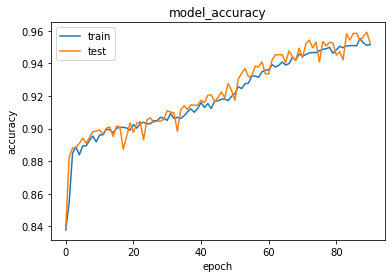

In [92]:
plt.plot(h_callback.history['accuracy'])
plt.plot(h_callback.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [93]:
#Plotting the loss graph

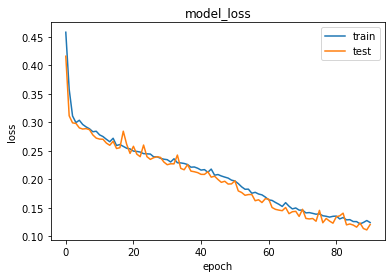

In [94]:
plt.plot(h_callback.history['loss'])
plt.plot(h_callback.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()